## Notebook de demonstração para o módulo integração

In [2]:
#Bloco de configuração para importar o módulo de um diretório pai
import sys
import os
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [5]:
from CB2325NumericaG07.integracao import integral_trapezio, integral_simpson38
from CB2325NumericaG07.erros import erro_absoluto, erro_relativo
import sympy as sp

print(integral_trapezio.__doc__)
print()
print(integral_simpson38.__doc__)



    Calcula a integral definida de uma função usando o método do trapézio.
    Compatível com funções do sympy e funções normais do python.

    Parâmetros:
    function: A função a ser integrada.
    a: Limite inferior da integração.
    b: Limite superior da integração.
    n: Número de subintervalos.

    Retorna:
    A aproximação da integral definida.

    Formula:
        ∫[a,b] f(x) dx ≈ (h/2) * [f(x0) + 2*f(x1) + 2*f(x2) + ... + 2*f(x(n-1)) + f(xn]]
        onde h = (b - a) / n e xi = a + i*h para i = 0, 1, ..., n
    


    Calcula a integral de f no intervalo [a, b] usando a regra de Simpson 3/8.
    Parâmetros:
        f (function): Função a ser integrada
        a (float): Limite inferior da integração
        b (float): Limite superior da integração
        n (int): Número de subintervalos (deve ser múltiplo de 3)
    Retorna:
        float: Aproximação da integral definida de f de a até b.
    


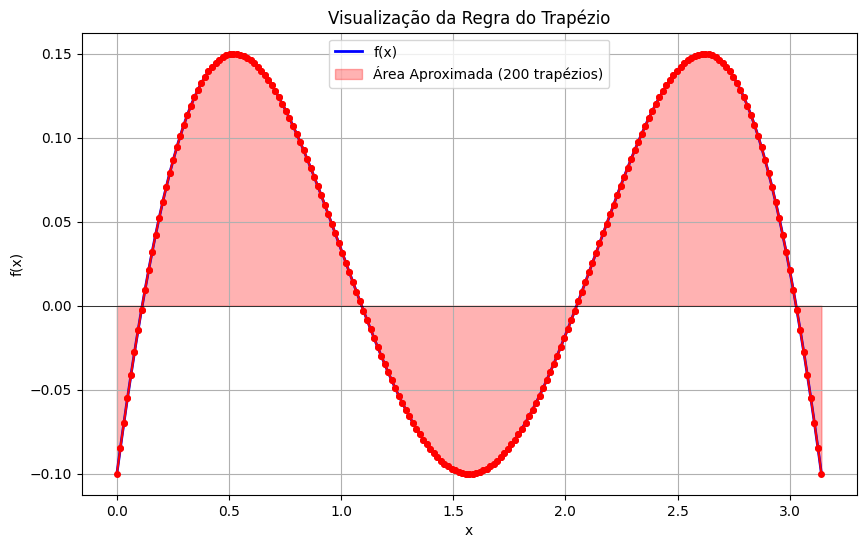

Resultado da integração de sin^2(x) de 0 a pi com n=200: 0.11500328432533863
Valor exato da integração: 0.115044407846124
Erro absoluto: 0.0000411235207851551
Erro relativo: 0.000357457798732463


In [6]:
x = sp.Symbol('x')
f = sp.sin(x)+(sp.cos(x))**2 - 1.1

a = 0
b = sp.pi
n = 200

resultado = integral_trapezio(f, a, b, n, True)
print(f"Resultado da integração de sin^2(x) de 0 a pi com n={n}: {resultado}")

# Comparação com o valor exato
valor_exato = sp.integrate(f, (x, a, b))
print(f"Valor exato da integração: {valor_exato.evalf()}")

erro = erro_absoluto(valor_exato.evalf(), resultado)
print(f"Erro absoluto: {erro}")
erro_rel = erro_relativo(valor_exato.evalf(), resultado)
print(f"Erro relativo: {erro_rel}")

Calculando a integral de f(x) = exp(x**2) de 0 a 2 com n=12 usando Simpson 3/8...


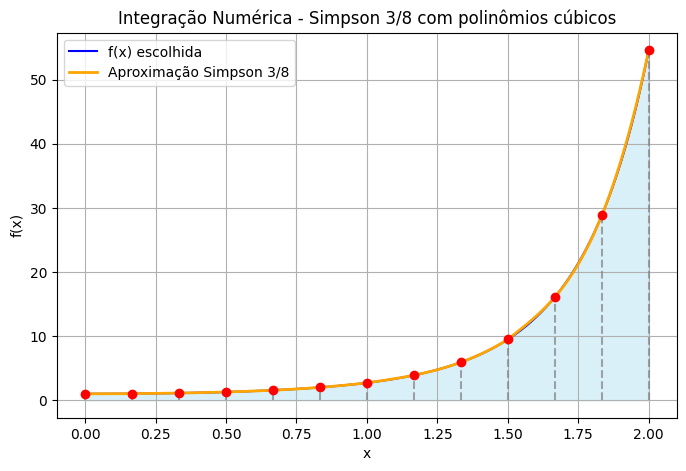

Resultado da integração (Simpson 3/8): 16.49168257653112
Valor 'exato' da integração (SymPy): 16.4526277655072
Erro absoluto: 0.0390548110238882
Erro relativo: 0.00237377345312377


In [11]:
import sympy as sp
import numpy as np

# --- 1. Definição Simbólica (para SymPy) ---
x = sp.Symbol('x')
# Esta é a EXPRESSÃO simbólica para o cálculo exato
f_simbolica = sp.exp(x**2)

# --- 2. Definição Numérica (para Simpson 3/8) ---
def f_numerica(x_val):
    # Esta é a FUNÇÃO numérica, que usa np.exp do NumPy
    # para retornar valores numéricos (floats ou arrays)
    return np.exp(x_val**2)

# --- Parâmetros ---
a = 0
b = 2
n = 12

# Use a expressão simbólica no print para mostrar a fórmula correta
print(f"Calculando a integral de f(x) = {f_simbolica} de {a} a {b} com n={n} usando Simpson 3/8...")

# --- Cálculo Numérico ---
# Use a FUNÇÃO NUMÉRICA (f_numerica) aqui.
# OBS: As linhas abaixo estão comentadas porque 'integral_simpson38',
# 'erro_absoluto', e 'erro_relativo' não foram definidas neste script.
# Você deve descomentá-las quando tiver essas funções disponíveis/importadas.

resultado = integral_simpson38(f_numerica, a, b, n, plotar=True)
print(f"Resultado da integração (Simpson 3/8): {resultado}")


# --- Cálculo Simbólico (Exato) ---
# Use a EXPRESSÃO SIMBÓLICA (f_simbolica) aqui.
valor_exato = sp.integrate(f_simbolica, (x, a, b))
valor_exato_num = valor_exato.evalf()
print(f"Valor 'exato' da integração (SymPy): {valor_exato_num}")

# --- Cálculo de Erro ---
# (Também comentado, pois depende da variável 'resultado')
erro_abs = erro_absoluto(valor_exato_num, resultado)
print(f"Erro absoluto: {erro_abs}")
erro_rel = erro_relativo(valor_exato_num, resultado)
print(f"Erro relativo: {erro_rel}")